# Exploratory Data Visualization on The I-94 Traffic Dataset

## Table Of Contents
---
## 1.) [Introduction_](#Introduction)
## 2.)[Analyzing Traffic Volume_](#Analyzing-Traffic-Volume)
## 3.)[Traffic Volume: Day vs. Night_](#Traffic-Volume:-Day-vs.-Night)
## 4.)[Traffic Volume: Day vs. Night (II)_ ](#Traffic-Volume:-Day-vs.-Night-(II))
## 5.)[Time Indicators_](#Time-Indicators)
## 6.)[Time Indicators (II)_](#Time-Indicators-(II))
## 7.)[Time Indicators (III)_](#Time-Indicators-(III))
## 8.)[Weather Indicators_](#Weather-Indicators)
## 8.)[Weather Types_](#Weather-Types)
## 9.)[Conclusion_](#Conclusion)

## Introduction
---

There are two types of Data Visualizations: 
* `Exploratory`
* `Explanatory`

Exploratory data visualization is used by analysts for their own usage and to understand the data better, Whereas, Explanatory Data Visualization is used for communicating and explaining to others of the patterns found while exploration.
In this Project, We will focus on Exploratory data visualization.

We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# so that jupyter can generate the matplot graphs.
%matplotlib inline

# Let's read our csv file using pandas
i_94=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We can read a lot of information about the dataset using the above info table, First We can see there is no Null-Value in all of the data set which is good for us!

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.


## Analyzing Traffic Volume
---
Let's plot a histogram of `traffic_volume` column to start with.

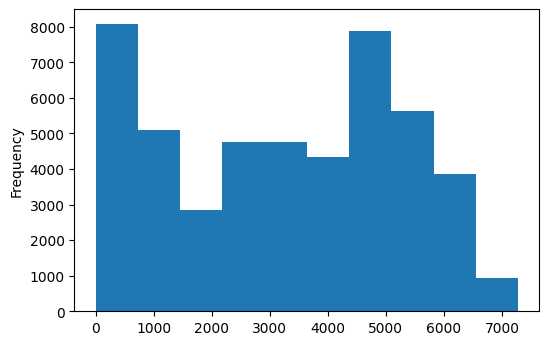

In [4]:
i_94['traffic_volume'].plot.hist()

In [5]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
i_94['date_time'].sort_values()

0        2012-10-02 09:00:00
1        2012-10-02 10:00:00
2        2012-10-02 11:00:00
3        2012-10-02 12:00:00
4        2012-10-02 13:00:00
                ...         
48199    2018-09-30 19:00:00
48200    2018-09-30 20:00:00
48201    2018-09-30 21:00:00
48202    2018-09-30 22:00:00
48203    2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: object

So, based on the data above, we can say that between `2012-10-02 09:00:00` and `2018-09-30 23:00:00`, which are the dates between which the data was collected, The traffic varied from 0 to 7280, 25 percent of the time the volume was 1193 or fewer, which was probably during night and road constructions.  

About 75 percent of the time, the traffic was 4933 or fewer, the remaining 25 percnet of the time, the traffic exceeded 4933. Let's analyze how night time and day time influences the traffic!

## Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

Let's satrt by converting our entire `date_time` column into datetime format.

In [7]:
i_94['date_time']=pd.to_datetime(i_94['date_time'])
i_94['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [8]:
daytime= i_94.copy()[(i_94['date_time'].dt.hour>=7) & (i_94['date_time'].dt.hour<19)]
nightime = i_94.copy()[(i_94['date_time'].dt.hour<7) | (i_94['date_time'].dt.hour>=19)]

In [9]:
print(nightime.shape)
daytime.shape

(24327, 9)


(23877, 9)

So we separated daytime and night time data and saved them in different dataframes, Let's move on to the next phase.

## Traffic Volume: Day vs. Night (II)
---
Now, We are going to compare the traffic volume at night and date, Let's plot the hsitogram for both `daytime` and `nightime` data sets.

Let's compare them side by side on a grid chart.

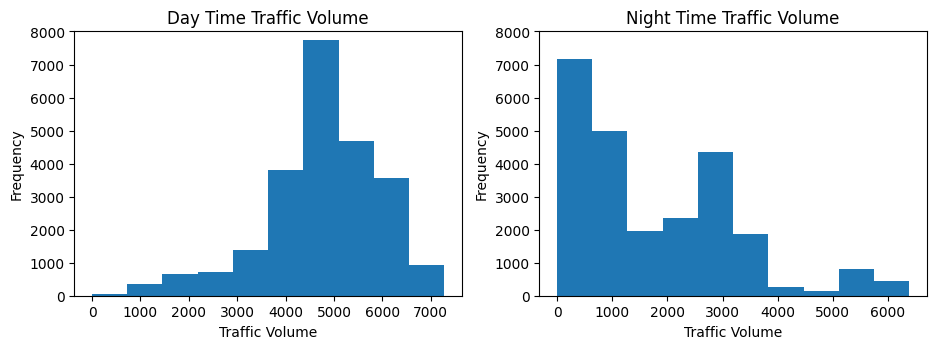

In [10]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.title('Day Time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(nightime['traffic_volume'])
plt.title('Night Time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)

plt.show()

In [11]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
nightime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

We can there is quite a lot of difference in the mean of daytime Traffic Volume and Nighttime Traffic Volume, where Daytime mean is more than twice the night time mean. 

75 percent of the traffic during nightime is less than 2819, While 75 percent of the traffic during day time is more than 4252, which indicates that traffic during night is light.

Since our goal in this project is to find indicators of heavy traffic, We will only be focusing on Day time data and leave the night time data.

## Time Indicators

In [13]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()

by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


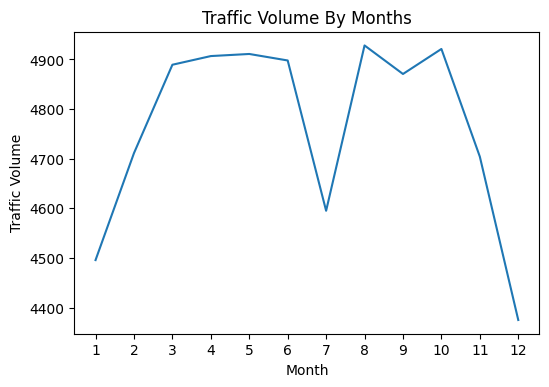

In [14]:
plt.plot(by_month['traffic_volume'])
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title("Traffic Volume By Months")
plt.show()

We see in this traffic Volume line plot against the months, that Traffic volume starts decreasing close to the end of year, probably because of winters or snow, and starts rising gradually back to high values by the beginning of March.

With one exception, and that is July, We see there is a dip in Traffic in July. What can be the reason for that, Does that happen every year or was it just this year. Let's take a deeper look by analyzing july's data over the years.

In [15]:
daytime['year']=daytime['date_time'].dt.year
for_july=daytime[daytime['month']==7]
by_year_july=for_july.groupby('year').mean()
by_year_july

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month
year,,,,,,
2013,296.796832,0.529838,0.0,24.245946,4914.354054,7.0
2014,296.225777,0.296686,0.0,52.542522,4871.598240,7.0
2015,296.657288,0.457241,0.0,35.301887,4613.146226,7.0
2016,297.018584,24.633670,0.0,52.534483,3924.923645,7.0
2017,297.139799,0.000000,0.0,41.724311,4734.120301,7.0
2018,296.794566,0.000000,0.0,46.719178,4586.899543,7.0


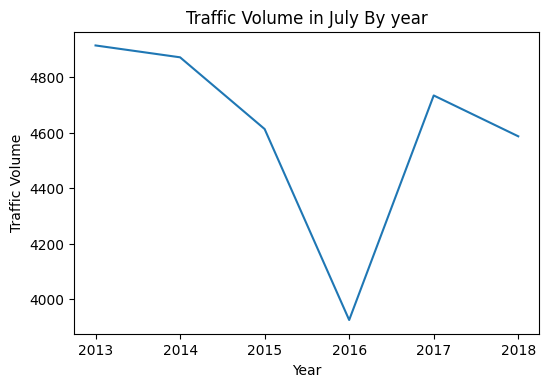

In [16]:
plt.plot(by_year_july['traffic_volume'])
plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.title("Traffic Volume in July By year")
plt.show()

In this graph, We notice that usually the volume of traffic in July is about the same as other warm months, except for 2016, where there is a big drop, probably because of a road construction. So, We can conclude that warm months show high traffic compared to cold months, reaching 5000 on an average day.

##  Time Indicators (II)
---

So, We did the our analysis using the months, now we'll do it by the day of the week. Let's see how the traffic volume varies by the day of the week.


In [17]:
daytime['dayofweek']=daytime['date_time'].dt.dayofweek
by_day=daytime.groupby('dayofweek').mean()
by_day['traffic_volume']

# 0 represents Monday and 6 represenst Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

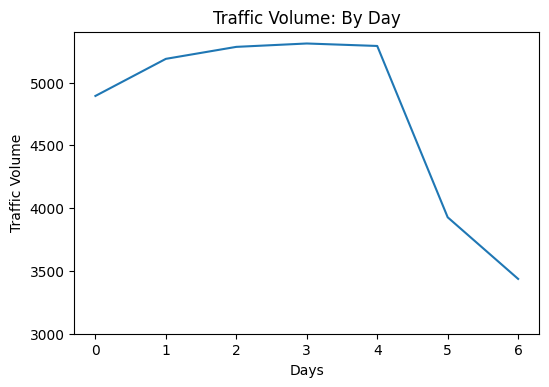

In [18]:
plt.plot(by_day['traffic_volume'])
plt.title('Traffic Volume: By Day')
plt.xlabel('Days')
plt.ylabel('Traffic Volume')
plt.ylim(bottom=3000)
plt.show()

Looking at the plot, We can tell the traffic volume drops in the weekend compared to the Business days(Mondays-Fridays), Except for Mondays the traffic remains over 5000 cars during the business Days.

## Time Indicators (III)
---
Before we compared business days to the weekends, Now, We'll compare hoour of the days and traffic volume. However, We dont want to do the weekends and business days together because weekends are going to drag down the average. SO Let's do both seperately.

In [19]:
daytime['hour']=daytime['date_time'].dt.hour
business_days=daytime[daytime['dayofweek']<=4] # 4 is friday in dayofweek
weekend= daytime[daytime['dayofweek']>4]
business_days_hour=business_days.groupby('hour').mean()
weekend_hour=weekend.groupby('hour').mean()
weekend_hour['traffic_volume'].min()
business_days_hour['traffic_volume'].max()

6189.473647224174

We will now plot a grid chart for weekdays and weekends by the hour vs traffic volume and see what hours are the busiest.

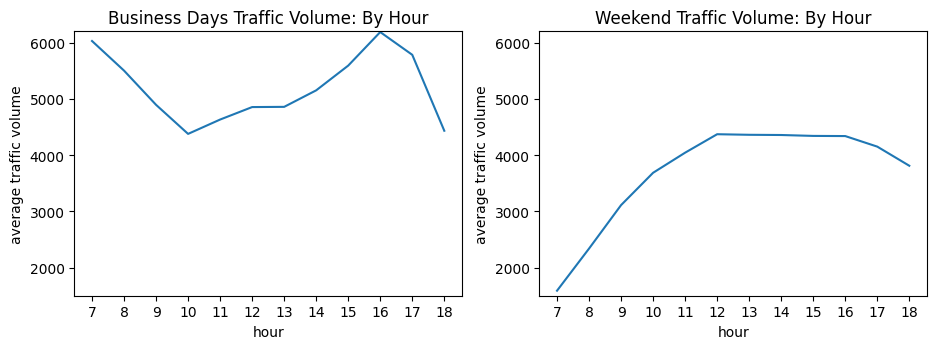

In [20]:
plt.figure(figsize=(11,3.5))
plt.subplot(1,2,1)
plt.plot(business_days_hour['traffic_volume'])
plt.title('Business Days Traffic Volume: By Hour')
plt.xlabel('hour')
plt.ylabel('average traffic volume')
plt.xticks(range(7,19))
plt.ylim((1500,6200))

plt.subplot(1,2,2)
plt.plot(weekend_hour['traffic_volume'])
plt.title('Weekend Traffic Volume: By Hour')
plt.xlabel('hour')
plt.ylabel('average traffic volume')
plt.xticks(range(7,19))
plt.ylim((1500,6200))

plt.show()

Based on the grid chart, We can deduce the following:
* Business Days have higher traffic volume in general, Rush hours being 7 and 16, which is the time people go to work and come back.
* On weekends the traffic is mild, It starts gradually and reaches the peak at around noon and stays constant for a couple hours before going back down.

Let's summarize what we have regarding traffic indicators up until now:
* Warm Months(March-September) are busies than colder months(October-February)
* Business Days are busier than Weekends.
* Rush hours are 7 and 16 on business days.

## Weather Indicators
---
There are a few columns related to weather in our Dataset, We know that Weather is a possible indicator of heavy traffic. So We'll look at the following columns:
* `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`,` weather_description`.

Some of these are numerical so we can start by looking at their correlation values with `'traffic_volume'`

In [21]:

daytime.corr().loc['traffic_volume',['temp', 'rain_1h', 'snow_1h', 'clouds_all']].sort_values()

clouds_all   -0.032932
snow_1h       0.001265
rain_1h       0.003697
temp          0.128317
Name: traffic_volume, dtype: float64

Above, We can see that temprature has the strongest correlation with `traffic_volume`, Let's make a scatter plot of this correlation to dig deeper.

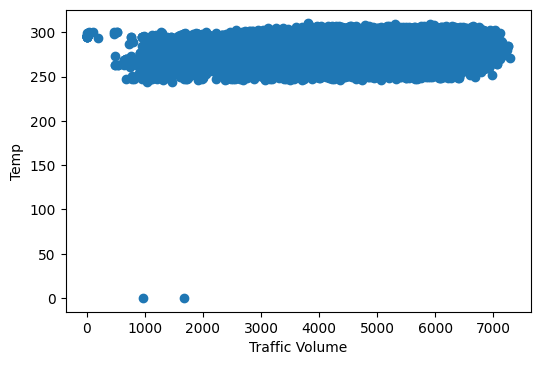

In [22]:
plt.scatter(x=daytime['traffic_volume'],y=daytime['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Temp')
plt.show()

In this scatter plot, two wrong temp values are messing with the y axis. Let's fix that.

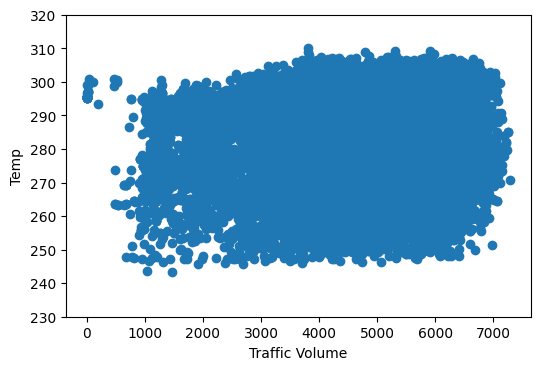

In [23]:
plt.scatter(x=daytime['traffic_volume'],y=daytime['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Temp')
plt.ylim(230,320)
plt.show()

Well, Temperature is not looking like it affects the traffic much, Let's look at other indicators: `weather_main`,` weather_description`

## Weather Types

Now, Let's do the same process we did with Business days and weekends, on `weather_main` and `weather_description` to calculate the the average traffic volume associated with each of the unique values in these columns.

In [24]:
by_weather_main=daytime.groupby('weather_main').mean()
by_weather_description=daytime.groupby('weather_description').mean()

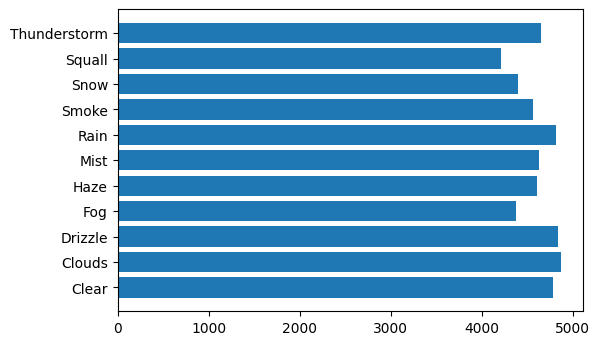

In [25]:
plt.barh(by_weather_main.index,by_weather_main['traffic_volume'])
plt.show()

It does not look like there is any weather where the traffic is more than 5000 cars, so it is difficult to determine any traffic indicator using this, Let's take a look at the graph using `weather_description` that has sub-categories to each of the main weather conditions.

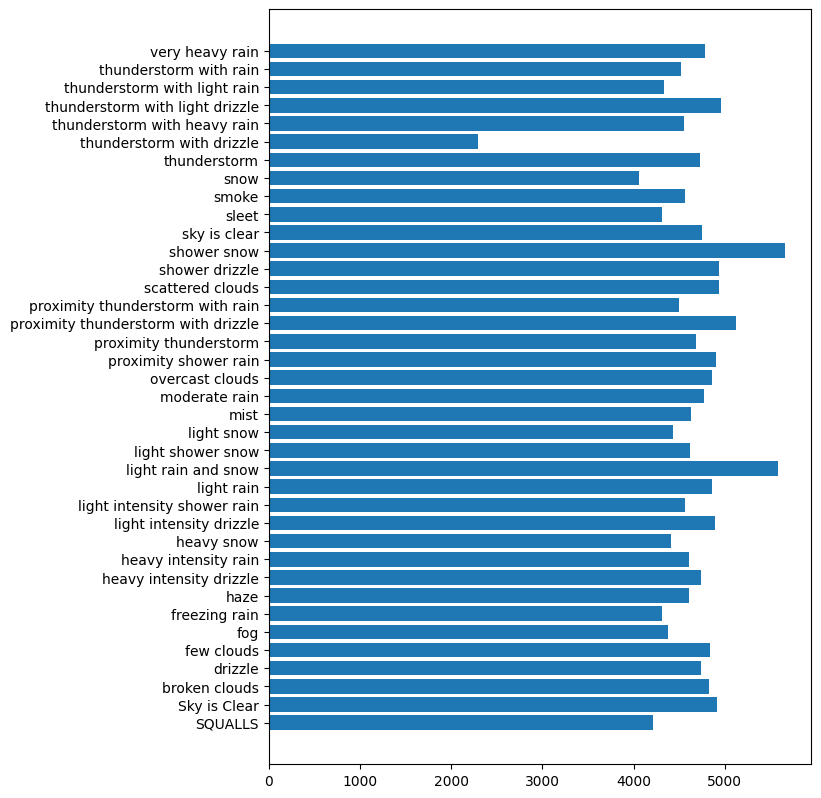

In [27]:
plt.figure(figsize=(7,10)) # Increasing the size of our figure to make it readable
plt.barh(by_weather_description.index,by_weather_description['traffic_volume'])
plt.show()

In the above bar graph, We see three weather conditions that have traffic more than 5000 cars:
* Proximity thunderstorm with drizzle
* Shower snow
* Light rain and snow

We can't perfectly determine why these conditions have the most traffic, It might because people who use bikes or walk to work can't do that so they use their cars.

## Conclusion
---
Our goal was to find the indicators of heavy traffic on I-94 highway. We found two different type of Indicators:

### Time Indicators:
* Warm Months(March-September) are busies than colder months(October-February)
* Business Days are busier than Weekends.
* Rush hours are 7 and 16 on business days.

### Weather Indicators:
* Proximity thunderstorm with drizzle
* Shower snow
* Light rain and snow

***A.G.***